In [85]:
!pip install pandas duckdb matplotlib

import pandas as pd
import duckdb
import os
import matplotlib.pyplot as plt

key_vendor = "Hardware Vendor\t"
key_system = "System"
key_processor = "Processor "

file_combined_path = '../spec-cpu2006-2017.csv'

if os.path.exists(file_combined_path):
    df = pd.read_csv(file_combined_path)
else:
    # Load data from the first CSV file
    file1_path = '../spec-cpu2006-results-20240723-164205.csv'
    if os.path.exists(file1_path):
        data1 = pd.read_csv(file1_path)
    else:
        raise FileNotFoundError(f"The file {file1_path} does not exist.")

    # Load data from the second CSV file
    file2_path = '../spec-cpu2017-results-20240723-171407.csv'
    if os.path.exists(file2_path):
        data2 = pd.read_csv(file2_path)
    else:
        raise FileNotFoundError(f"The file {file2_path} does not exist.")

    # Add a column to each dataframe to label the source
    data1['Source'] = 'cpu2006'
    data2['Source'] = 'cpu2017'
    data2['Baseline'] = data2['Base Result'] #/ 9

    # Concatenate the dataframes
    df = pd.concat([data1, data2], ignore_index=True)
    df["hw_avail_year"] = df["HW Avail"].str.split('-').str[1].astype(int)
    df["baseline_per_chip"] = df["Baseline"] / df["# Chips "]
    df["baseline_per_core"] = df["Baseline"] / df["# Cores"]
    df.to_csv(file_combined_path, index=False)
    
# con = duckdb.connect("../spec.db")
# con.sql("DROP TABLE IF EXISTS spec")
# con.sql("CREATE TABLE spec AS SELECT * FROM df")
# con.close()


/var/folders/z4/3bk11y114tn3lh60qlpnzh6m0000gn/T/ipykernel_79386/1786444647.py:15: DtypeWarning: Columns (11,13,19,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_combined_path)


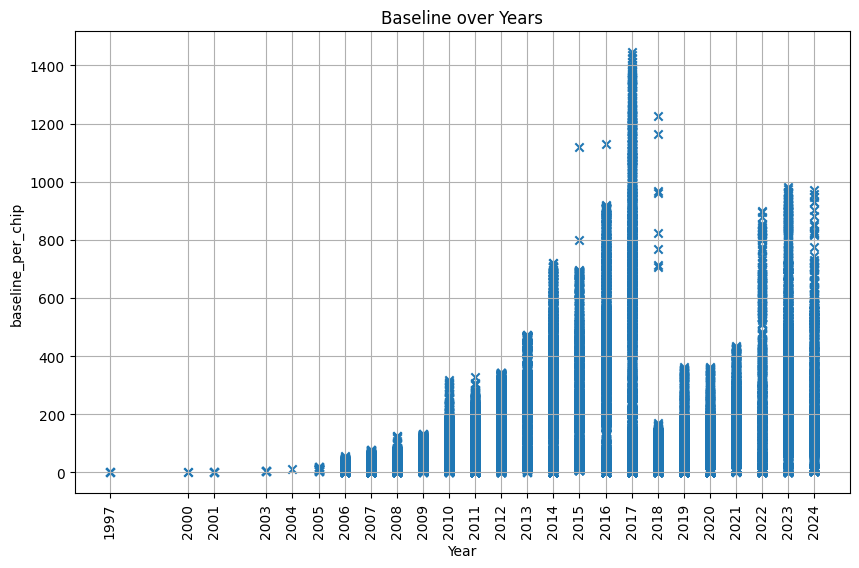

In [86]:
plt.close('all')
# display(df)
plt.figure(figsize=(10, 6))
# y_val = 'Baseline'
y_val = 'baseline_per_chip'
#y_val = 'baseline_per_core'
plt.scatter(
    df['hw_avail_year'],
    df[y_val],
    marker='x')
plt.xlabel('Year')
plt.ylabel(y_val)
plt.title('Baseline over Years')
plt.xticks(ticks=df['hw_avail_year'].unique(), rotation=90)
plt.grid(True)
plt.show()
plt.close()

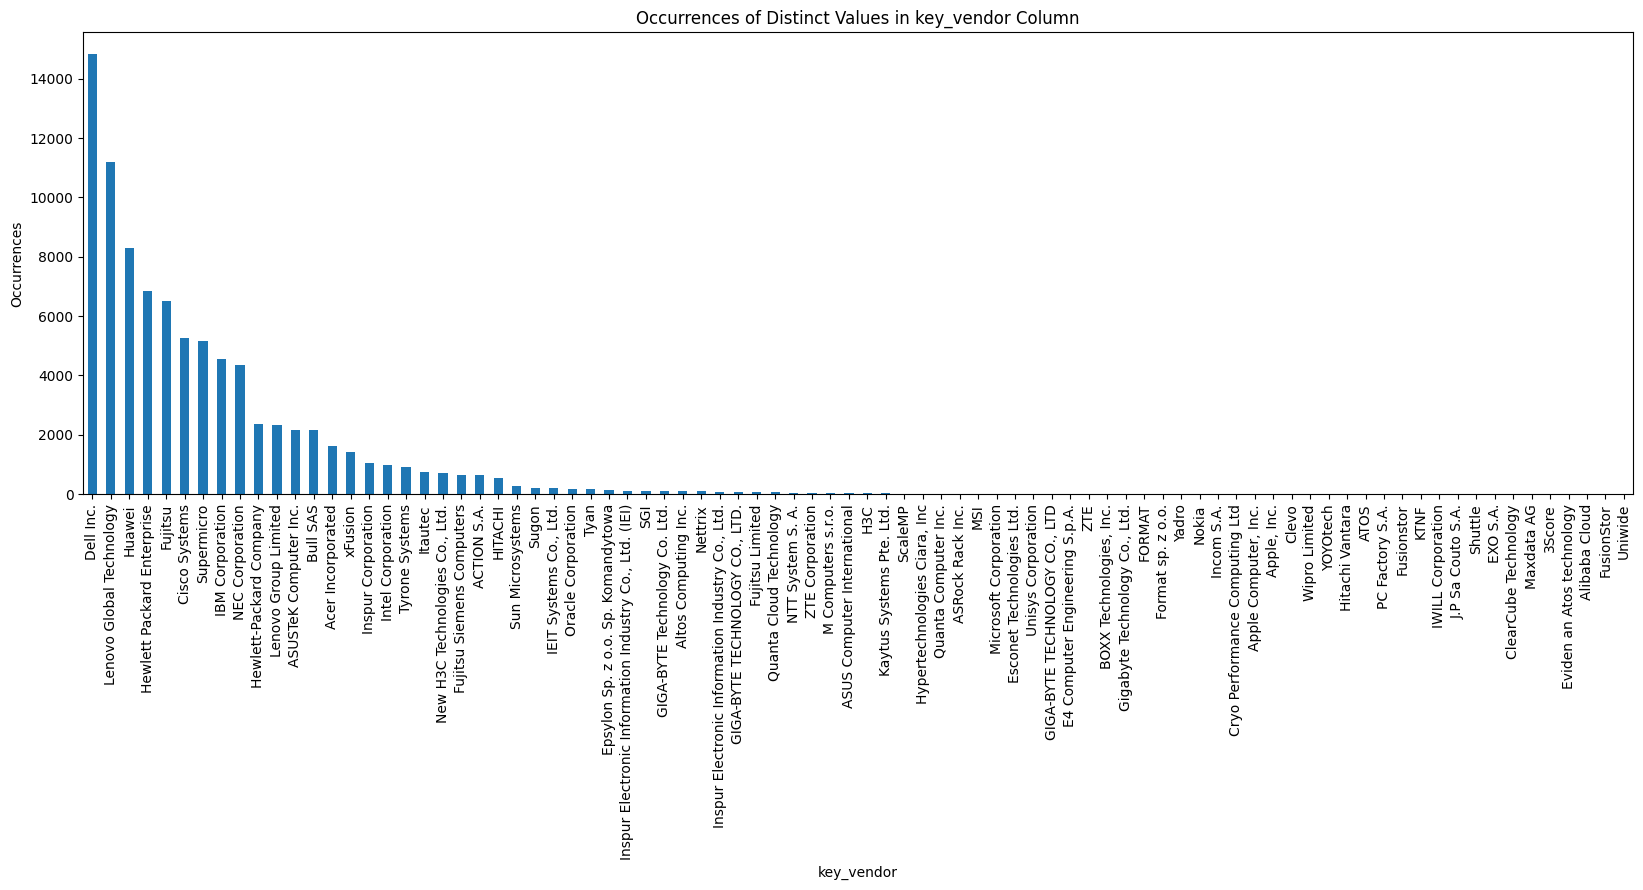

In [87]:
# Count the occurrences of each distinct value in the "key_vendor" column
value_counts = df[key_vendor].value_counts()

# Create a histogram
plt.figure(figsize=(20, 6))
value_counts.plot(kind='bar')
plt.title('Occurrences of Distinct Values in key_vendor Column')
plt.xlabel('key_vendor')
plt.ylabel('Occurrences')
plt.xticks(rotation=90)
plt.show()

In [88]:

# # print(df[key_vendor].unique())
# df = df[df[key_vendor].str.contains('intel', case=False)]
# df.to_csv("../spec-intel-cpu2006-2017.csv", header=True)

# plt.close('all')
# # display(df)
# plt.figure(figsize=(10, 6))
# # y_val = 'Baseline'
# y_val = 'baseline_per_chip'
# #y_val = 'baseline_per_core'
# plt.scatter(
#     df['hw_avail_year'],
#     df[y_val],
#     marker='x')
# plt.xlabel('Year')
# plt.ylabel(y_val)
# plt.title('Baseline over Years')
# plt.xticks(ticks=df['hw_avail_year'].unique(), rotation=90)
# plt.grid(True)
# plt.show()
# plt.close()

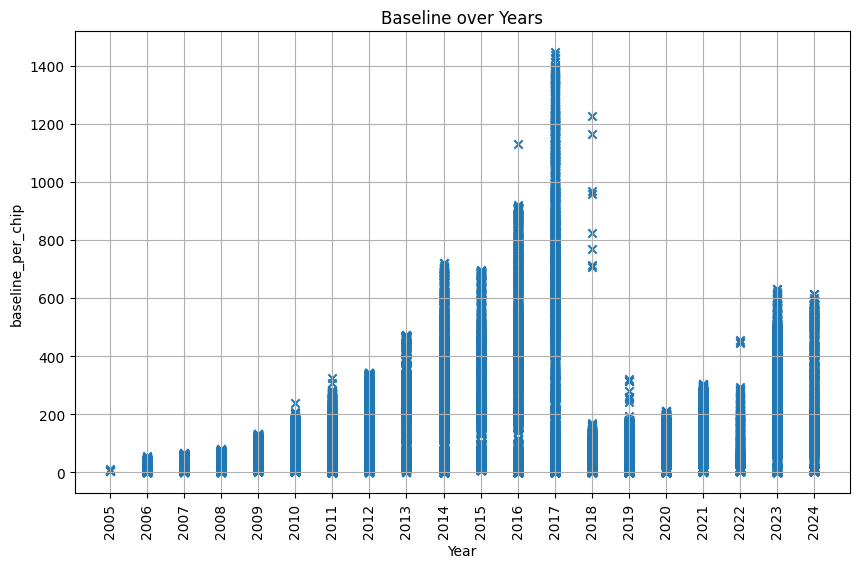

In [89]:
# print(df[key_vendor].unique())
# print(df[key_system].unique())

df = df[df[key_processor].str.contains('xeon', case=False)]
print(len(df))
# df.to_csv("../spec-intel-xeon-cpu2006-2017.csv", header=True)

# plt.close('all')
# # display(df)
# plt.figure(figsize=(10, 6))
# # y_val = 'Baseline'
# y_val = 'baseline_per_chip'
# #y_val = 'baseline_per_core'
# plt.scatter(
#     df['hw_avail_year'],
#     df[y_val],
#     marker='x')
# plt.xlabel('Year')
# plt.ylabel(y_val)
# plt.title('Baseline over Years')
# plt.xticks(ticks=df['hw_avail_year'].unique(), rotation=90)
# plt.grid(True)
# plt.show()
# plt.close()